In [29]:
import pandas as pd
import numpy as np
path = "/Users/shuyi/Documents/OMSCS/MachineLearning/HW1/mentalHealthData/"
train_data_file = "survey.csv"
# load the data from preprocessing and feature engineering
train_data = pd.read_csv(path + train_data_file)

In [30]:
train_data[:10]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [31]:
def get_dtype_lists(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))

def show_all_uniques(data,features):
    dtypes = get_dtype_lists(data,features)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [32]:
(train_data.shape[0] - train_data.dropna().shape[0])/train_data.shape[0]

0.931691818903892

In [33]:
train_data.shape[0] - train_data.dropna().shape[0]

1173

In [34]:
train_data.drop("Timestamp",1, inplace=True)
train_data.drop("self_employed",1, inplace=True)
train_data.drop("state",1, inplace=True)

In [35]:
show_all_uniques(train_data, train_data.columns)

int64

Age: count(53) [37 44 32 31 33 35 39 42 23 29]

object

Gender: count(49) ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female']
Country: count(48) ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']
family_history: count(2) ['No' 'Yes']
treatment: count(2) ['Yes' 'No']
work_interfere: count(5) ['Often' 'Rarely' 'Never' 'Sometimes' nan]
no_employees: count(6) ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work: count(2) ['No' 'Yes']
tech_company: count(2) ['Yes' 'No']
benefits: count(3) ['Yes' "Don't know" 'No']
care_options: count(3) ['Not sure' 'No' 'Yes']
wellness_program: count(3) ['No' "Don't know" 'Yes']
seek_help: count(3) ['Yes' "Don't know" 'No']
anonymity: count(3) ['Yes' "Don't know" 'No']
leave: count(5) ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence: count(3) ['No' 'Maybe' 'Yes'

In [36]:
textual_features = ["comments"]
train_data.drop("comments",1,inplace=True)

In [37]:
dtype = get_dtype_lists(train_data, train_data.columns)

In [38]:
numerics = dtype["int64"]
categories = dtype["object"]
for category in categories: train_data[category] = train_data[category].apply(str)

In [39]:
train_data[categories].head()

,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,Male,Canada,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [40]:
from seaborn import countplot, color_palette, set_style, despine
from pandas import DataFrame
from matplotlib.pyplot import show
from IPython.display import display

ModuleNotFoundError: No module named 'seaborn'

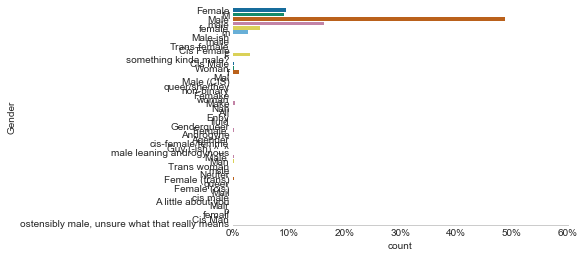

,Male,male,Female,M,female,F,m,f,Make,Woman,...,fluid,male leaning androgynous,Androgyne,p,A little about you,Cis Female,Female (cis),Male-ish,non-binary,Nah
Gender,615,206,121,116,62,38,34,15,4,3,...,1,1,1,1,1,1,1,1,1,1


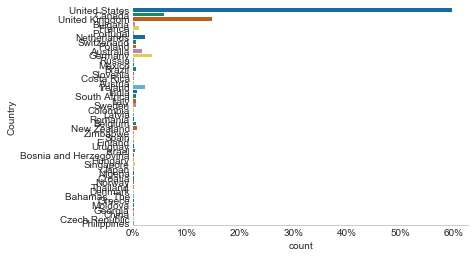

,United States,United Kingdom,Canada,Germany,Ireland,Netherlands,Australia,France,India,New Zealand,...,Slovenia,China,Spain,Bosnia and Herzegovina,Latvia,Uruguay,Norway,Zimbabwe,"Bahamas, The",Thailand
Country,751,185,72,45,27,27,21,13,10,8,...,1,1,1,1,1,1,1,1,1,1


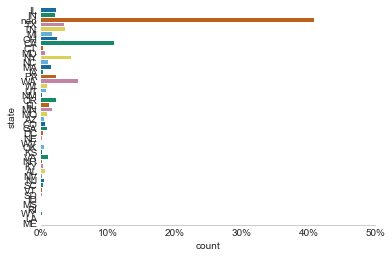

,nan,CA,WA,NY,TN,TX,OH,IL,OR,PA,...,KS,NM,WY,NE,ID,RI,ME,MS,LA,WV
state,515,138,70,57,45,44,30,29,29,29,...,3,2,2,2,1,1,1,1,1,1


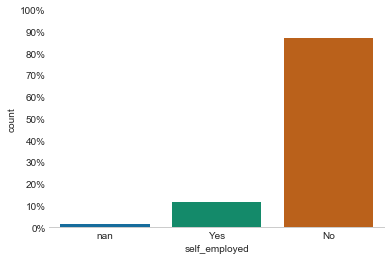

,No,Yes,nan
self_employed,1095,146,18


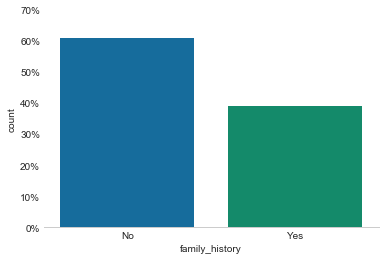

,No,Yes
family_history,767,492


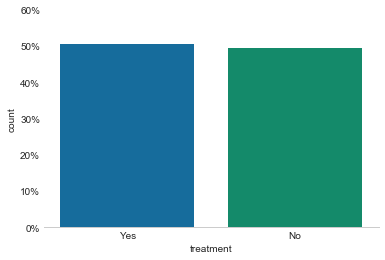

,Yes,No
treatment,637,622


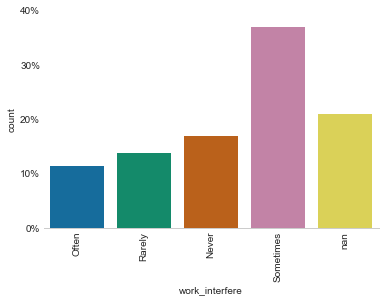

,Sometimes,nan,Never,Rarely,Often
work_interfere,465,264,213,173,144


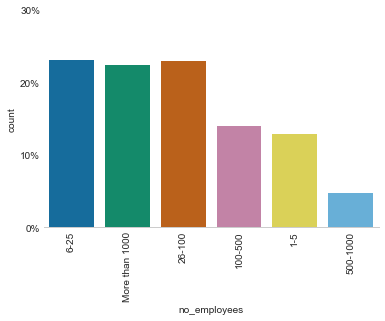

,6-25,26-100,More than 1000,100-500,1-5,500-1000
no_employees,290,289,282,176,162,60


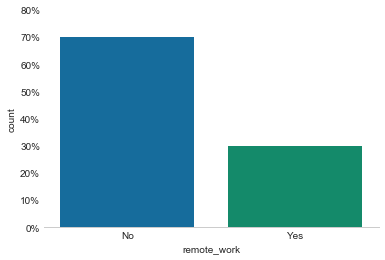

,No,Yes
remote_work,883,376


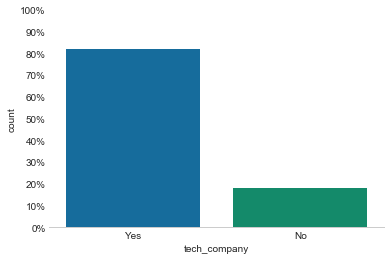

,Yes,No
tech_company,1031,228


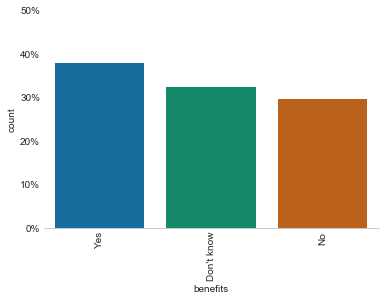

,Yes,Don't know,No
benefits,477,408,374


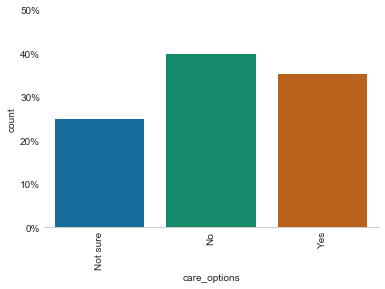

,No,Yes,Not sure
care_options,501,444,314


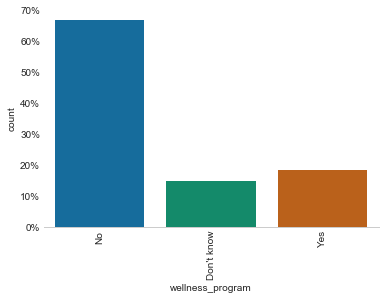

,No,Yes,Don't know
wellness_program,842,229,188


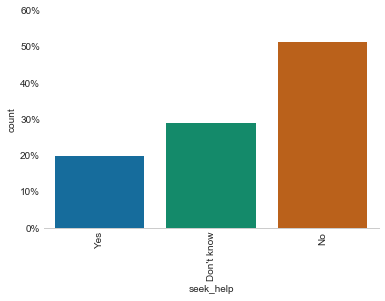

,No,Don't know,Yes
seek_help,646,363,250


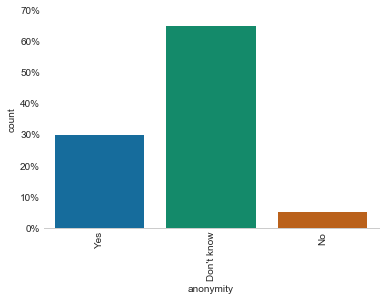

,Don't know,Yes,No
anonymity,819,375,65


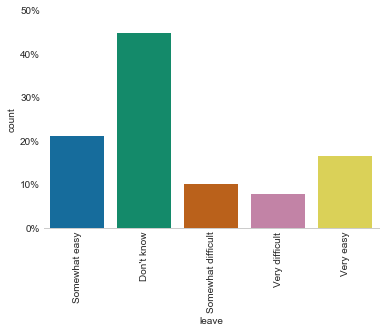

,Don't know,Somewhat easy,Very easy,Somewhat difficult,Very difficult
leave,563,266,206,126,98


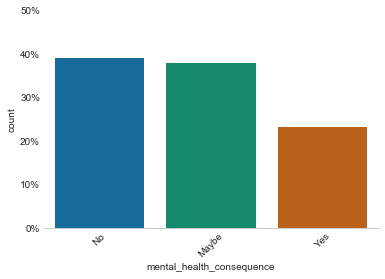

,No,Maybe,Yes
mental_health_consequence,490,477,292


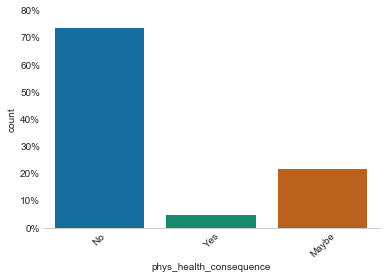

,No,Maybe,Yes
phys_health_consequence,925,273,61


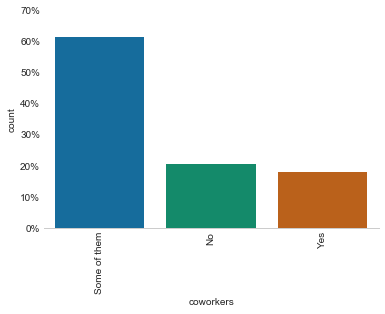

,Some of them,No,Yes
coworkers,774,260,225


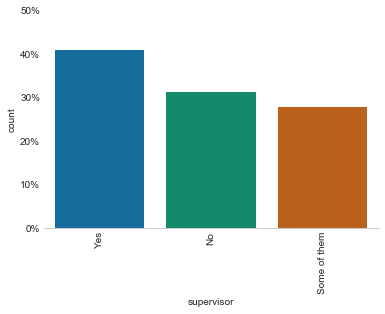

,Yes,No,Some of them
supervisor,516,393,350


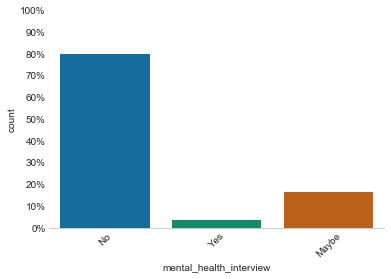

,No,Maybe,Yes
mental_health_interview,1008,207,44


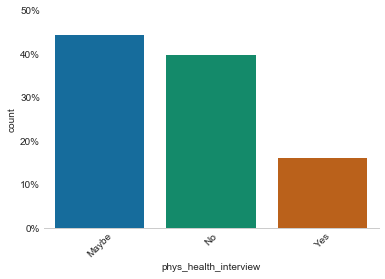

,Maybe,No,Yes
phys_health_interview,557,500,202


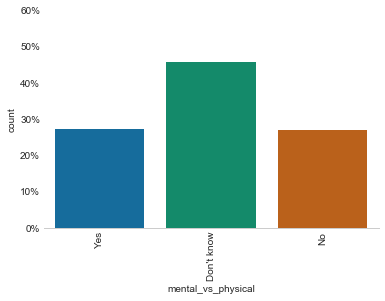

,Don't know,Yes,No
mental_vs_physical,576,343,340


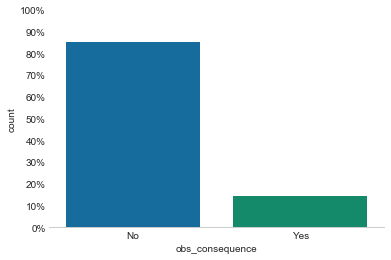

,No,Yes
obs_consequence,1075,184


In [21]:
set_style("whitegrid")
set_style({"axes.grid":False})
for c in categories:
    
    if train_data[c].unique().size > 10:
        ax = countplot(data=train_data, y=c, palette=color_palette("colorblind"))
        
        last_tick = int(round(ax.get_xticks()[-1]/len(train_data),1) * 10) + 1
        ax.set_xticks([i * (len(train_data) * 0.1) for i in range(0,last_tick)])
        ax.set_xticklabels(["{:.0f}%".format((tick / len(train_data)) * 100) for tick in ax.get_xticks()])
        
        despine(left=True)
        show()
        display(DataFrame(train_data[c].value_counts()).T)
        continue
        
    ax = countplot(train_data[c], palette=color_palette("colorblind"))
    
    last_tick = int(round(ax.get_yticks()[-1]/len(train_data),1) * 10) + 1
    ax.set_yticks([i * (len(train_data) * 0.1) for i in range(0,last_tick)])
    ax.set_yticklabels(["{:.0f}%".format((tick / len(train_data)) * 100) for tick in ax.get_yticks()])
    
    maximum_yticklabel_length = max([len(str(x)) for x in train_data[c].unique()])
    
    if maximum_yticklabel_length in range (5,7):
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    elif maximum_yticklabel_length > 6:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
    despine(left=True)
    
    show()
    
    display(DataFrame(train_data[c].value_counts()).T)

In [41]:
# the age variable
train_data["Age"] = train_data.Age.apply(lambda x: -1 if x <= 0 or x > 100 else x)
train_data["Age"] = train_data[train_data.Age != -1]
train_data["Age"].unique()


array([37.0, 44.0, 32.0, 31.0, 33.0, 35.0, 39.0, 42.0, 23.0, 29.0, 36.0,
       27.0, 46.0, 41.0, 34.0, 30.0, 40.0, 38.0, 50.0, 24.0, 18.0, 28.0,
       26.0, 22.0, 19.0, 25.0, 45.0, 21.0, nan, 43.0, 56.0, 60.0, 54.0,
       55.0, 48.0, 20.0, 57.0, 58.0, 47.0, 62.0, 51.0, 65.0, 49.0, 5.0,
       53.0, 61.0, 8.0, 11.0, 72.0], dtype=object)

In [42]:
countplot(train_data.Age, palette=color_palette("colorblind"))
show()

NameError: name 'countplot' is not defined

In [62]:
# delete rows containing nan values
# there are 6 rows with nan data fileds, delete them
train_data.dropna(axis=0, inplace=True)

In [63]:
# categorize the age by range
t = pd.cut(train_data["Age"], np.arange(0, 100, 20))
train_data["Age Category"] = [tt.right for tt in t ]


In [65]:
train_data.drop("Age",1, inplace=True)
train_data[:5]

,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age Category
0,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,40
1,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,60
2,Male,Canada,No,No,Rarely,6-25,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,40
3,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,40
4,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,40


clean up the data and define the y column

In [66]:
genders = train_data["Gender"]
genders.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [67]:
from nltk import edit_distance
genders = train_data["Gender"]
genders = genders.apply(str.lower).apply(str.strip, " ")
genders = genders.apply(lambda x: "male" if edit_distance("male",x) < 2 else x)
genders = genders.apply(lambda x: "female" if edit_distance("female",x) < 2 else x)
genders = genders.apply(lambda x: x.replace("(cis)","").replace("cis", ""))
genders = genders.apply(lambda x: "male" if x.strip(" ") in ["m", "man", "mail",] else x)
genders = genders.apply(lambda x: "female" if x in ["f", "femail"] or "female" in x else x)
genders = genders.apply(lambda x: "trans female" if ("female" in x or "woman" in x) and "trans" in x else x)
genders = genders.apply(lambda x: "male" if ("male" in x or "guy" in x) and "female" not in x else x)
genders = genders.apply(lambda x: "genderqueer" if "female" not in x and "male" not in x else x)
genders.unique()

array(['female', 'male', 'genderqueer', 'trans female'], dtype=object)

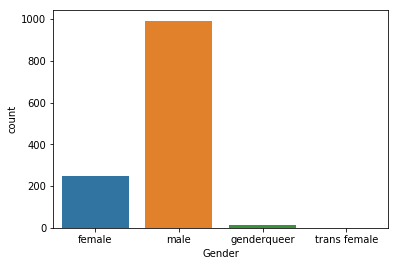

In [68]:
countplot(genders)
show()

In [69]:
train_data['Gender'] = genders

In [70]:
# save the data for the next step
train_data.to_csv(path + "step1.csv")